<h1 style="text-align:center; font-family:Georgia; font-weight:bold; ">Imports</h1>

In [3]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import librosa.display
import matplotlib.pyplot as plt

<h1 style="text-align:center; font-family:Georgia; font-weight:bold; ">Constants and Global Variables</h1>

In [6]:
audio = pd.read_csv('Collected Datasets/audio.csv')
text = pd.read_csv('Collected Datasets/text.csv')

<h1 style="text-align:center; font-family:Georgia; font-weight:bold; ">Plots</h1>

In [ ]:
def filterByMfccLength(df, minLength=50, maxLength=120, mfccColumn='mfcc'):
    def mfccLength(mfccStr):
        mfccVals = np.array(list(map(float, mfccStr.split(','))))
        return mfccVals.size // 13
    lengths = df[mfccColumn].apply(mfccLength)
    filteredDf = df[(lengths >= minLength) & (lengths <= maxLength)].copy()
    return filteredDf

audio = filterByMfccLength(audio)


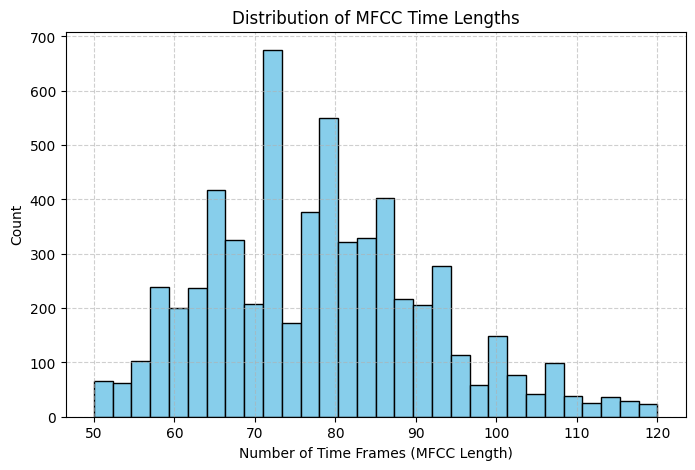

In [42]:
def plotMfccLengthsWithStats(df):
    lengths = []
    for mfcc_str in df['mfcc']:
        mfcc_vals = np.array(list(map(float, mfcc_str.split(','))))
        time_steps = mfcc_vals.size // 13  
        lengths.append(time_steps)
    
    plt.figure(figsize=(8, 5))
    plt.hist(lengths, bins=30, color='skyblue', edgecolor='black')
    plt.title('Distribution of MFCC Time Lengths')
    plt.xlabel('Number of Time Frames (MFCC Length)')
    plt.ylabel('Count')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

plotMfccLengthsWithStats(audio)


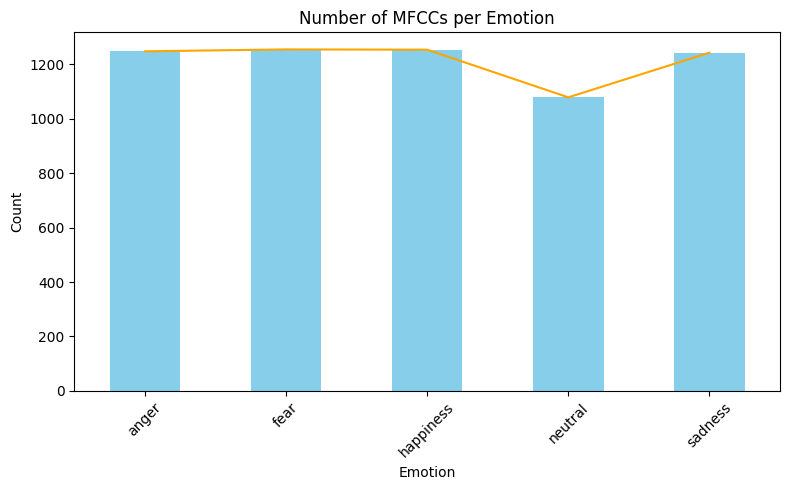

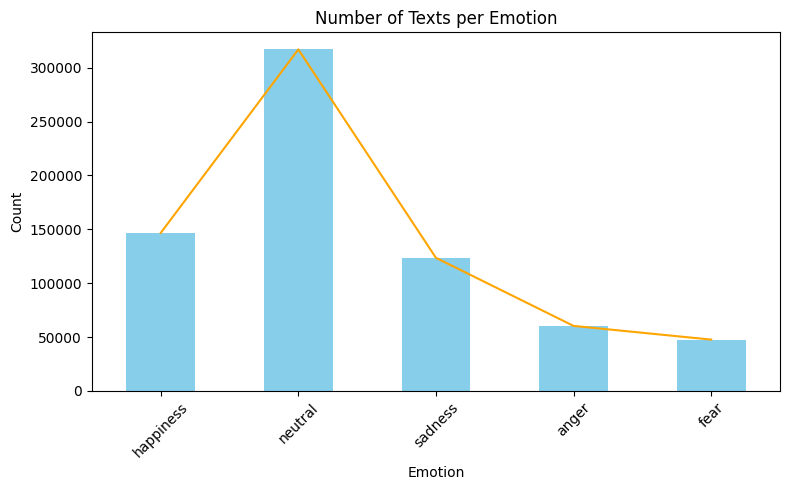

In [43]:
def plotEmotionCounts(df, feature="Texts"):
    emotionCounts = df.groupby('Emotion').size().reindex(df['Emotion'].unique())
    
    plt.figure(figsize=(8, 5))
    emotionCounts.plot(kind='bar', color='skyblue')
    
    plt.plot(range(len(emotionCounts)), emotionCounts.values, color='orange', label='Trend')

    
    plt.title(f'Number of {feature} per Emotion')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plotEmotionCounts(audio, "MFCCs")
plotEmotionCounts(text)


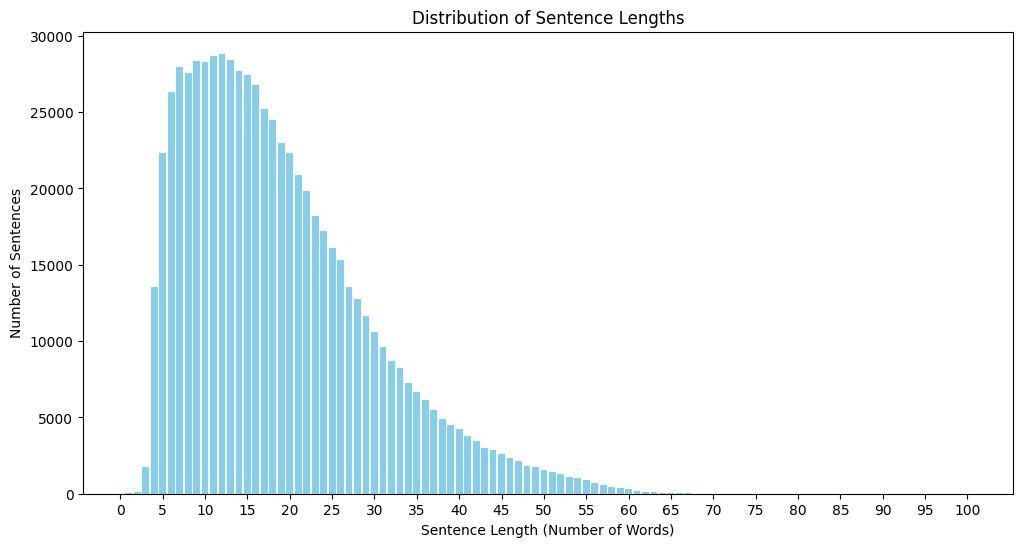

In [7]:
def plotTextLengthDistribution(data, column='Text', maxLen=100):
    lengths = data[column].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
    
    lengthCounts = lengths.value_counts().sort_index()
    
    lengthCounts = lengthCounts[lengthCounts.index <= maxLen]
    
    plt.figure(figsize=(12,6))
    plt.bar(lengthCounts.index, lengthCounts.values, color='skyblue')
    plt.xlabel('Sentence Length (Number of Words)')
    plt.ylabel('Number of Sentences')
    plt.title('Distribution of Sentence Lengths')
    plt.xticks(range(0, maxLen+1, 5))
    plt.show()


plotTextLengthDistribution(text)